In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import sklearn
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')

# Creating data using sklearn

In [2]:
data = make_regression(n_samples = 1000,                 #number of samples
                                      n_features = 3,            #number of features
                                      n_informative = 3,         #number of useful features

                                      random_state = 42)            #set for same data points for each run



In [3]:
type(data)

tuple

In [4]:
len(data)

2

In [5]:
X = data[0]

In [6]:
y = data[1]

In [7]:
X.shape

(1000, 3)

# Transforming Data features into Data Frames with columns Research, Salaries, Infrastructure and Expenditures

In [8]:
Research = X[:,0]

In [9]:
Salaries = X[:,1]

In [10]:
Infrastructure = X[:,2]

In [11]:
# Scale Research from 0 to 2000
Research = np.interp(Research, (Research.min(), Research.max()), (0, 2000))

In [12]:
Research

array([ 721.85725078,  469.3812216 , 1077.20384662,  883.30118835,
       1258.68382597,  632.07253378,  678.18443513,  987.61595201,
        789.13110933,  561.42161938,  968.21912167, 1286.65716066,
       1086.54839437,  774.09434828,  423.5212309 , 1416.74866013,
       1117.53730937,  856.65214553,  932.1130991 ,   49.75654065,
       1144.63252014,  809.91216603,  985.44538759,  638.01032823,
        414.65616234,  824.29204682, 1146.27515933, 1036.88766915,
       1193.57784574,  431.86479088,  235.25849443,  168.99720889,
        667.14019407,  708.61702536,  949.67510909,  819.50871959,
       1388.71170602, 1010.40770109, 1184.04456854,  564.14053841,
        965.06697712,  619.88422872, 1013.58475197,  567.09853666,
        984.58209938, 1131.70223536,  446.41949899, 1287.00514541,
        670.45124859, 1217.26647748, 1159.5525403 , 1288.9122749 ,
        786.77050433, 1281.61491381, 1076.03503762,  806.86500587,
        738.26504534,  666.02873758,  632.44425332, 1074.13311

In [13]:
Salaries = np.interp(Salaries, (Salaries.min(), Salaries.max()), (0, 1500))

In [14]:
Infrastructure = np.interp(Infrastructure, (Infrastructure.min(), Infrastructure.max()), (0, 2500))

In [15]:
y = data[1]
y.shape

(1000,)

In [16]:
y

array([-1.42338105e+02, -1.58520012e+02,  8.03345971e+01, -1.68176389e+02,
        1.81493775e+02,  1.04678329e+02,  2.02397931e+02, -1.18139772e+02,
       -9.77690126e+01,  2.89617852e+01, -3.73589172e+01,  1.20328037e+02,
        3.60634016e+01, -1.38066226e+02,  2.01625663e+02,  1.77481385e+02,
        1.78713265e+02,  1.33321395e+02,  2.77336225e+01, -2.84102770e+01,
        4.13132572e+01,  2.28608309e+02, -3.14158826e+01, -1.33728801e+01,
       -9.93324279e+01, -4.97151414e+01, -1.08320706e+02, -8.85686626e+01,
        1.96209329e+02,  3.21662512e+01,  6.22223526e+00, -9.89209172e+01,
       -1.22413703e+02, -1.82923988e+02, -1.20697452e+02,  9.07472329e+01,
       -1.27414226e+02,  1.19537688e+02, -3.93122933e+01, -1.31413437e+02,
       -7.57339501e+01, -1.17324025e+02,  1.22753511e+02, -6.08892589e+01,
       -1.14728623e+02,  2.48701884e+02,  7.90059046e+01,  1.17470775e+01,
       -9.32982666e+01,  6.98012058e+00, -1.92038211e+02,  7.29530123e+01,
       -5.28026746e+01,  

In [17]:
y = np.interp(y, (y.min(), y.max()), (6000, 20000))

In [18]:
Expenditures = y

In [19]:
df = pd.DataFrame(index = ['Research', 'Salaries','Infrastructure', 'Expenditures'],
                        data = [Research, Salaries, Infrastructure, Expenditures]).T


In [20]:
df

,Research,Salaries,Infrastructure,Expenditures
0,721.857251,613.903942,765.705784,10160.329845
1,469.381222,613.054782,795.516457,9906.531892
2,1077.203847,999.031362,892.341111,13652.741259
3,883.301188,427.943743,935.641612,9755.080727
4,1258.683826,945.261280,1371.053555,15239.327596
...,...,...,...,...
995,944.144896,662.449234,1699.288797,14085.407676
996,835.747970,637.154467,626.099384,9981.171495
997,1065.151976,646.862827,1433.367330,13213.698646
998,547.326065,900.664293,1179.932777,13274.638267


# Visualize and Inspect each feature

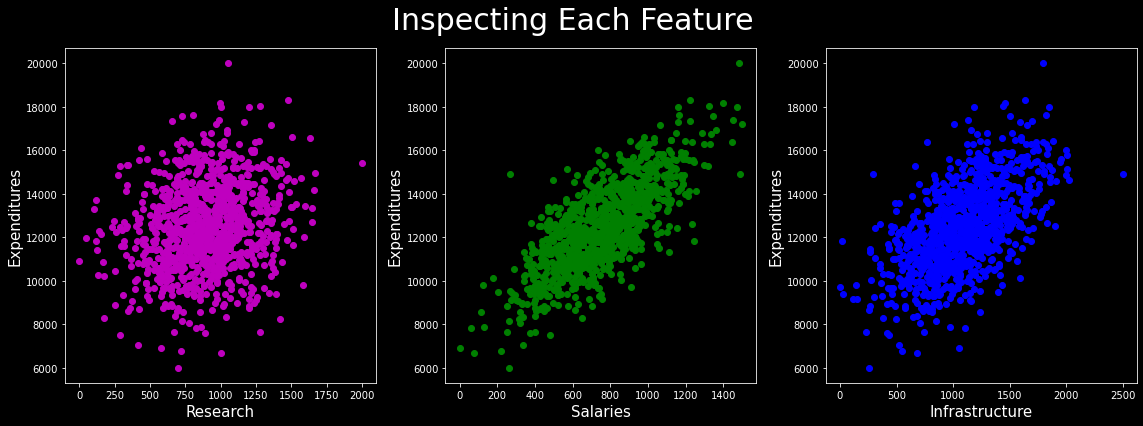

In [21]:
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))
plt.suptitle('Inspecting Each Feature', fontsize = 30)

axes[0].plot(df['Research'],df['Expenditures'],'mo')
axes[0].set_ylabel("Expenditures", fontsize = 15)
axes[0].set_xlabel("Research", fontsize = 15)

axes[1].plot(df['Salaries'],df['Expenditures'],'go')
axes[1].set_ylabel("Expenditures", fontsize = 15)
axes[1].set_xlabel("Salaries", fontsize = 15)

axes[2].plot(df['Infrastructure'],df['Expenditures'],'bo')
axes[2].set_ylabel("Expenditures", fontsize = 15)
axes[2].set_xlabel("Infrastructure", fontsize = 15)

plt.tight_layout();

In [22]:
X = df.iloc[:,:-1].values

In [23]:
X

array([[ 721.85725078,  613.90394182,  765.70578445],
       [ 469.3812216 ,  613.05478187,  795.51645662],
       [1077.20384662,  999.03136166,  892.34111134],
       ...,
       [1065.15197636,  646.86282674, 1433.36732978],
       [ 547.32606549,  900.66429282, 1179.93277677],
       [ 600.4082175 ,  454.12205772, 1332.585463  ]])

In [24]:
y = df.iloc[:,-1].values

In [25]:
y = y.reshape(-1,1)

# Splitting data into test and train

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [27]:
X_test.shape

(200, 3)

In [28]:
X_train.shape

(800, 3)

In [29]:
y_train.shape

(800, 1)

In [30]:
X_train

array([[ 431.86479088,  865.0105837 , 1185.6421298 ],
       [ 907.18211249,  758.54914908, 1152.12367736],
       [ 823.19792766, 1176.24839757, 1248.16057742],
       ...,
       [1046.5487849 ,  697.55757397, 1669.43565893],
       [ 670.86117908,  823.93547095, 1155.09501108],
       [1298.92855652,  463.85109922, 1198.71239078]])

# Data Standardization

In [31]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Create Neural Network for Multiple Regression

In [32]:
model = Sequential()

model.add(Dense(units = 1, input_shape =(3,), activation = None))

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [34]:
model.compile(optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01) ,loss='mse')

In [35]:
history = model.fit(X_train,y_train, epochs = 1001) # Default Batch size = 32, therefore iterations = 800/32 = 25

Epoch 1/1001
25/25 [==============================] - 0s 1ms/step - loss: 102811696.0000
Epoch 2/1001
25/25 [==============================] - 0s 1ms/step - loss: 37449184.0000
Epoch 3/1001
25/25 [==============================] - 0s 1ms/step - loss: 13644708.0000
Epoch 4/1001
25/25 [==============================] - 0s 964us/step - loss: 4973144.0000
Epoch 5/1001
25/25 [==============================] - 0s 1ms/step - loss: 1810462.8750
Epoch 6/1001
25/25 [==============================] - 0s 1ms/step - loss: 660362.6250
Epoch 7/1001
25/25 [==============================] - 0s 1ms/step - loss: 240881.4062
Epoch 8/1001
25/25 [==============================] - 0s 1ms/step - loss: 87882.6797
Epoch 9/1001
25/25 [==============================] - 0s 971us/step - loss: 32060.3281
Epoch 10/1001
25/25 [==============================] - 0s 1ms/step - loss: 11703.0840
Epoch 11/1001
25/25 [==============================] - 0s 952us/step - loss: 4275.5977
Epoch 12/1001
25/25 [=====================

25/25 [==============================] - 0s 795us/step - loss: 4.4562e-04
Epoch 97/1001
25/25 [==============================] - 0s 860us/step - loss: 4.4648e-04
Epoch 98/1001
25/25 [==============================] - 0s 997us/step - loss: 4.4555e-04
Epoch 99/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4673e-04
Epoch 100/1001
25/25 [==============================] - 0s 2ms/step - loss: 4.4700e-04
Epoch 101/1001
25/25 [==============================] - 0s 2ms/step - loss: 4.4637e-04
Epoch 102/1001
25/25 [==============================] - 0s 2ms/step - loss: 4.4546e-04
Epoch 103/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4595e-04
Epoch 104/1001
25/25 [==============================] - 0s 956us/step - loss: 4.4639e-04
Epoch 105/1001
25/25 [==============================] - 0s 873us/step - loss: 4.4654e-04
Epoch 106/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4578e-04
Epoch 107/1001
25/25 [=============================

25/25 [==============================] - 0s 937us/step - loss: 4.4548e-04
Epoch 190/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4511e-04
Epoch 191/1001
25/25 [==============================] - 0s 925us/step - loss: 4.4543e-04
Epoch 192/1001
25/25 [==============================] - 0s 2ms/step - loss: 4.4548e-04
Epoch 193/1001
25/25 [==============================] - 0s 2ms/step - loss: 4.4516e-04
Epoch 194/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4669e-04
Epoch 195/1001
25/25 [==============================] - 0s 835us/step - loss: 4.4605e-04
Epoch 196/1001
25/25 [==============================] - 0s 877us/step - loss: 4.4533e-04
Epoch 197/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4606e-04
Epoch 198/1001
25/25 [==============================] - 0s 874us/step - loss: 4.4619e-04
Epoch 199/1001
25/25 [==============================] - 0s 837us/step - loss: 4.4630e-04
Epoch 200/1001
25/25 [========================

25/25 [==============================] - 0s 1ms/step - loss: 4.4609e-04
Epoch 283/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4639e-04
Epoch 284/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4621e-04
Epoch 285/1001
25/25 [==============================] - 0s 2ms/step - loss: 4.4578e-04
Epoch 286/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4522e-04
Epoch 287/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4675e-04
Epoch 288/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4678e-04
Epoch 289/1001
25/25 [==============================] - 0s 3ms/step - loss: 4.4587e-04
Epoch 290/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4690e-04
Epoch 291/1001
25/25 [==============================] - 0s 2ms/step - loss: 4.4704e-04
Epoch 292/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4589e-04
Epoch 293/1001
25/25 [==============================] - 0s

25/25 [==============================] - 0s 1ms/step - loss: 4.4534e-04
Epoch 376/1001
25/25 [==============================] - 0s 804us/step - loss: 4.4619e-04
Epoch 377/1001
25/25 [==============================] - 0s 802us/step - loss: 4.4570e-04
Epoch 378/1001
25/25 [==============================] - 0s 901us/step - loss: 4.4564e-04
Epoch 379/1001
25/25 [==============================] - 0s 811us/step - loss: 4.4655e-04
Epoch 380/1001
25/25 [==============================] - 0s 831us/step - loss: 4.4523e-04
Epoch 381/1001
25/25 [==============================] - 0s 813us/step - loss: 4.4712e-04
Epoch 382/1001
25/25 [==============================] - 0s 901us/step - loss: 4.4722e-04
Epoch 383/1001
25/25 [==============================] - 0s 916us/step - loss: 4.4590e-04
Epoch 384/1001
25/25 [==============================] - 0s 904us/step - loss: 4.4590e-04
Epoch 385/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4525e-04
Epoch 386/1001
25/25 [==================

25/25 [==============================] - 0s 973us/step - loss: 4.4584e-04
Epoch 469/1001
25/25 [==============================] - 0s 992us/step - loss: 4.4578e-04
Epoch 470/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4565e-04
Epoch 471/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4549e-04
Epoch 472/1001
25/25 [==============================] - 0s 911us/step - loss: 4.4568e-04
Epoch 473/1001
25/25 [==============================] - 0s 980us/step - loss: 4.4594e-04
Epoch 474/1001
25/25 [==============================] - 0s 906us/step - loss: 4.4600e-04
Epoch 475/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4637e-04
Epoch 476/1001
25/25 [==============================] - 0s 867us/step - loss: 4.4596e-04
Epoch 477/1001
25/25 [==============================] - 0s 953us/step - loss: 4.4635e-04
Epoch 478/1001
25/25 [==============================] - 0s 882us/step - loss: 4.4583e-04
Epoch 479/1001
25/25 [====================

25/25 [==============================] - 0s 1ms/step - loss: 4.4531e-04
Epoch 561/1001
25/25 [==============================] - 0s 931us/step - loss: 4.4641e-04
Epoch 562/1001
25/25 [==============================] - 0s 971us/step - loss: 4.4560e-04
Epoch 563/1001
25/25 [==============================] - 0s 921us/step - loss: 4.4621e-04
Epoch 564/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4583e-04
Epoch 565/1001
25/25 [==============================] - 0s 985us/step - loss: 4.4641e-04
Epoch 566/1001
25/25 [==============================] - 0s 916us/step - loss: 4.4681e-04
Epoch 567/1001
25/25 [==============================] - 0s 941us/step - loss: 4.4613e-04
Epoch 568/1001
25/25 [==============================] - 0s 969us/step - loss: 4.4678e-04
Epoch 569/1001
25/25 [==============================] - 0s 879us/step - loss: 4.4515e-04
Epoch 570/1001
25/25 [==============================] - 0s 841us/step - loss: 4.4547e-04
Epoch 571/1001
25/25 [==================

25/25 [==============================] - 0s 1ms/step - loss: 4.4580e-04
Epoch 653/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4695e-04
Epoch 654/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4558e-04
Epoch 655/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4617e-04
Epoch 656/1001
25/25 [==============================] - 0s 2ms/step - loss: 4.4604e-04
Epoch 657/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4632e-04
Epoch 658/1001
25/25 [==============================] - 0s 887us/step - loss: 4.4597e-04
Epoch 659/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4592e-04
Epoch 660/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4571e-04
Epoch 661/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4638e-04
Epoch 662/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4696e-04
Epoch 663/1001
25/25 [==============================] - 

25/25 [==============================] - 0s 2ms/step - loss: 4.4580e-04
Epoch 746/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4650e-04
Epoch 747/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4638e-04
Epoch 748/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4567e-04
Epoch 749/1001
25/25 [==============================] - 0s 924us/step - loss: 4.4616e-04
Epoch 750/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4598e-04
Epoch 751/1001
25/25 [==============================] - 0s 997us/step - loss: 4.4606e-04
Epoch 752/1001
25/25 [==============================] - 0s 2ms/step - loss: 4.4608e-04
Epoch 753/1001
25/25 [==============================] - 0s 2ms/step - loss: 4.4582e-04
Epoch 754/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4584e-04
Epoch 755/1001
25/25 [==============================] - 0s 2ms/step - loss: 4.4642e-04
Epoch 756/1001
25/25 [==============================] 

25/25 [==============================] - 0s 1ms/step - loss: 4.4565e-04
Epoch 839/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4570e-04
Epoch 840/1001
25/25 [==============================] - 0s 964us/step - loss: 4.4657e-04
Epoch 841/1001
25/25 [==============================] - 0s 959us/step - loss: 4.4557e-04
Epoch 842/1001
25/25 [==============================] - 0s 859us/step - loss: 4.4614e-04
Epoch 843/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4571e-04
Epoch 844/1001
25/25 [==============================] - 0s 911us/step - loss: 4.4622e-04
Epoch 845/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4585e-04
Epoch 846/1001
25/25 [==============================] - 0s 869us/step - loss: 4.4621e-04
Epoch 847/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4620e-04
Epoch 848/1001
25/25 [==============================] - 0s 997us/step - loss: 4.4528e-04
Epoch 849/1001
25/25 [========================

25/25 [==============================] - 0s 839us/step - loss: 4.4620e-04
Epoch 932/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4603e-04
Epoch 933/1001
25/25 [==============================] - 0s 929us/step - loss: 4.4569e-04
Epoch 934/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4581e-04
Epoch 935/1001
25/25 [==============================] - 0s 927us/step - loss: 4.4584e-04
Epoch 936/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4623e-04
Epoch 937/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4608e-04
Epoch 938/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4616e-04
Epoch 939/1001
25/25 [==============================] - 0s 897us/step - loss: 4.4547e-04
Epoch 940/1001
25/25 [==============================] - 0s 1ms/step - loss: 4.4559e-04
Epoch 941/1001
25/25 [==============================] - 0s 959us/step - loss: 4.4640e-04
Epoch 942/1001
25/25 [==========================

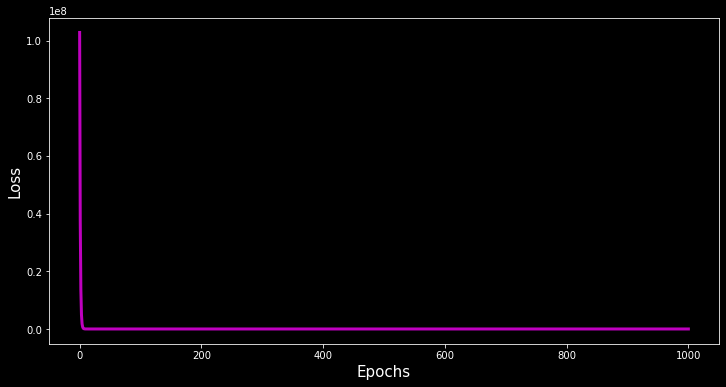

In [36]:
plt.figure(figsize =(12,6))
plt.plot(history.history['loss'],'m', lw = 3, label= 'Training Loss')
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel( 'Loss', fontsize = 15)
plt.show()

# Weight and Bias Values

In [38]:
print("Weights are :" )
print(model.layers[0].get_weights()[0])

print(" ")

print("Bias is :" )
print(model.layers[0].get_weights()[1])

Weights are :
[[ 409.542 ]
 [1557.3394]
 [1229.1176]]
 
Bias is :
[12483.43]


# Testing and evaluating the model

In [39]:
y_pred = model.predict(X_test)

7/7 [==============================] - 0s 1ms/step


In [40]:
from sklearn import metrics
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('MAE:', np.sqrt(metrics.mean_absolute_error(y_test, y_pred)))
print('R2:', metrics.r2_score(y_test, y_pred))

RMSE: 0.021106890115911082
MAE: 0.1452719806280106
R2: 0.9999999998960687


# Further Evaluating the model

In [41]:
test_data = X_test[113,:].reshape(1,3)
test_data.shape

(1, 3)

In [42]:
test_label = y_test[113]
test_label

array([11080.38932656])

In [43]:
y_t = model.predict(test_data)

1/1 [==============================] - 0s 17ms/step


In [44]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_label, y_t)))
print('MAE:', np.sqrt(metrics.mean_absolute_error(test_label, y_t)))
print('R2:', metrics.r2_score(test_label, y_t))

RMSE: 0.021162499906495214
MAE: 0.14547336493838042
R2: nan


D:\Anaconda\lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
